# WiDS Datathon 2026 Notebook
This is where your analysis begins. Use this notebook for EDA, modeling, and explanations.

In [44]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marianruxandraelena","key":"d555c8c19d5748d1c2da4888fc6b6613"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c wids-university-datathon-2025

 93% 375M/403M [00:02<00:00, 135MB/s] 
100% 403M/403M [00:02<00:00, 168MB/s]


In [45]:
!unzip wids-university-datathon-2025.zip -d data/

Archive:  wids-university-datathon-2025.zip
replace data/WiDS _-_ Watch Duty_ Data Dictionary.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/WiDS _-_ Watch Duty_ Data Dictionary.docx  
replace data/evac_zone_status_geo_event_map.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/evac_zone_status_geo_event_map.csv  
replace data/evac_zones_gis_evaczone.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/evac_zones_gis_evaczone.csv  
replace data/evac_zones_gis_evaczonechangelog.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/evac_zones_gis_evaczonechangelog.csv  y

replace data/fire_perimeters_gis_fireperimeter.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: data/fire_perimeters_gis_fireperimeter.csv  y

replace data/fire_perimeters_gis_fireperimeterchangelog.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: data/fire_perimeters_gis_fireperimeterchangelog.csv  
replace data/geo_events_externalgeoevent.csv? [y]es, [n]o,

In [46]:
!ls data

 evac_zones_gis_evaczonechangelog.csv
 evac_zones_gis_evaczone.csv
 evac_zone_status_geo_event_map.csv
 fire_perimeters_gis_fireperimeterchangelog.csv
 fire_perimeters_gis_fireperimeter.csv
 geo_events_externalgeoeventchangelog.csv
 geo_events_externalgeoevent.csv
 geo_events_geoeventchangelog.csv
 geo_events_geoevent.csv
'WiDS _-_ Watch Duty_ Data Dictionary.docx'


In [60]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
geo = pd.read_csv("data/geo_events_geoevent.csv", parse_dates=["date_created", "date_modified"])
changelog = pd.read_csv("data/geo_events_geoeventchangelog.csv", parse_dates=["date_created"])
map_event_zone = pd.read_csv("data/evac_zone_status_geo_event_map.csv")


In [61]:
# păstrăm DOAR incendiile
geo = geo[geo["geo_event_type"] == "wildfire"].copy()

# redenumire ID
geo = geo.rename(columns={"id": "geo_event_id"})


In [62]:
def extract_json(js, key):
    if not isinstance(js, str) or "{" not in js:
        return np.nan
    try:
        d = json.loads(js.strip('"'))
        return d.get(key, np.nan)
    except:
        return np.nan

json_fields = [
    "containment",
    "acreage",
    "is_fps",
    "is_prescribed",
    "evacuation_orders",
    "evacuation_warnings"
]

for col in json_fields:
    geo[col] = geo["data"].apply(lambda x: extract_json(x, col))

geo.drop(columns=["data"], inplace=True)

# tipuri corecte
geo["containment"] = pd.to_numeric(geo["containment"], errors="coerce")
geo["acreage"] = pd.to_numeric(geo["acreage"], errors="coerce")
geo["is_fps"] = geo["is_fps"].astype("boolean")
geo["is_prescribed"] = geo["is_prescribed"].astype("boolean")


In [63]:
geo.head()

,geo_event_id,date_created,date_modified,geo_event_type,name,is_active,description,address,lat,lng,notification_type,external_id,external_source,incident_id,reporter_managed,is_visible,containment,acreage,is_fps,is_prescribed,evacuation_orders,evacuation_warnings
0,76,2021-08-11 00:09:56.481066,2023-02-09 20:34:24.180117,wildfire,Todd Fire,0,NaN,"Llano Rd & Todd Rd, Santa Rosa, California 95...",38.386100,-122.769299,normal,1008375748,pulsepoint,76.0,1,0,100.0,50.0,False,False,None,None
1,77,2021-08-11 07:21:46.054995,2023-02-09 20:34:24.225186,wildfire,Vegetation Fire,0,NaN,"Guerneville Rd & W Steele Ln, Santa Rosa, CA 9...",38.459967,-122.728927,normal,1008583077,pulsepoint,77.0,1,0,100.0,0.0,False,False,None,None
2,78,2021-08-11 21:02:16.301416,2023-02-09 20:34:24.266124,wildfire,Ford Fire,0,NaN,"CA-1 & Valley Ford Estero Rd, Valley Ford, CA ...",38.318328,-122.925698,normal,1008957703,pulsepoint,78.0,1,0,0.0,0.0,False,False,None,None
3,79,2021-08-12 01:46:31.043052,2023-02-09 20:34:24.308048,wildfire,Vegetation Fire,0,NaN,"19428 Redwood Dr, Monte Rio, CA 95462, USA",38.479988,-122.994156,normal,1009152928,pulsepoint,79.0,1,0,0.0,0.0,False,False,None,None
4,80,2021-08-12 02:40:30.939331,2023-02-09 20:34:24.358582,wildfire,Shoreline Fire,0,NaN,"Shoreline Dr, Napa, CA 94558, USA",38.315222,-122.276532,normal,1009187142,pulsepoint,80.0,1,0,100.0,0.0,False,False,None,None


In [64]:
def has_risk_signal(changes):
    if not isinstance(changes, str):
        return False
    text = changes.lower()
    return any(k in text for k in [
        "radio_traffic",
        "spotting",
        "structure_threat",
        "rate_of_spread"
    ])

geo_changelog["risk_signal"] = geo_changelog["changes"].apply(has_risk_signal)


In [69]:
first_risk = (
    geo_changelog[geo_changelog["risk_signal"]]
    .groupby("geo_event_id")["date_created"]
    .min()
    .reset_index()
    .rename(columns={"date_created": "first_risk_time"})
)


In [70]:
geo = geo.merge(first_risk, on="geo_event_id", how="left")
geo["first_risk_time"]

,first_risk_time
0,NaT
1,NaT
2,NaT
3,NaT
4,NaT
...,...
61774,NaT
61775,NaT
61776,NaT
61777,NaT


In [71]:
# Forțăm toate datetime-urile relevante să fie UTC tz-aware
geo["date_modified"] = pd.to_datetime(
    geo["date_modified"], utc=True, errors="coerce"
)

geo["date_created"] = pd.to_datetime(
    geo["date_created"], utc=True, errors="coerce"
)

geo["first_risk_time"] = pd.to_datetime(
    geo["first_risk_time"], utc=True, errors="coerce"
)


In [72]:
geo["risk_to_update_min"] = (
    (geo["date_modified"] - geo["first_risk_time"])
    .dt.total_seconds() / 60
)

# curățare valori imposibile
geo = geo[
    (geo["risk_to_update_min"].isna()) |
    ((geo["risk_to_update_min"] >= 0) & (geo["risk_to_update_min"] <= 7*24*60))
]


In [73]:
DELAY_THRESHOLD_MIN = 180  # 3 ore

geo["is_delayed"] = geo["risk_to_update_min"] > DELAY_THRESHOLD_MIN


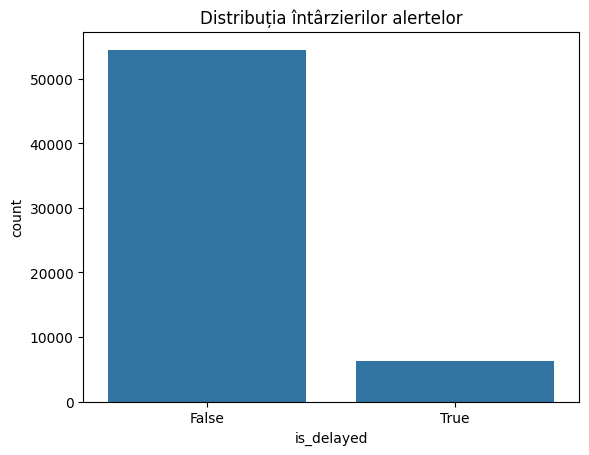

In [74]:
sns.countplot(x="is_delayed", data=geo)
plt.title("Distribuția întârzierilor alertelor")
plt.show()


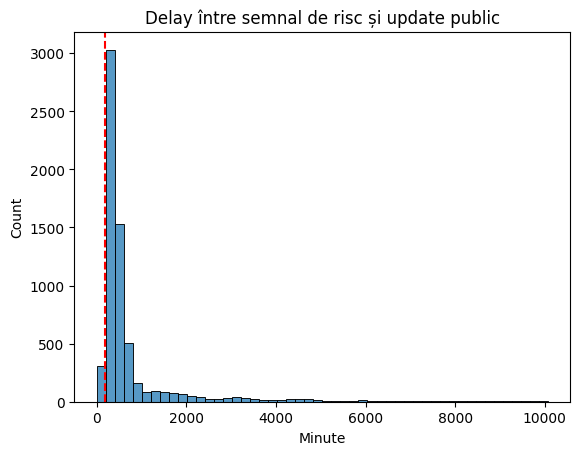

In [75]:
sns.histplot(geo["risk_to_update_min"].dropna(), bins=50)
plt.axvline(180, color="red", linestyle="--")
plt.title("Delay între semnal de risc și update public")
plt.xlabel("Minute")
plt.show()


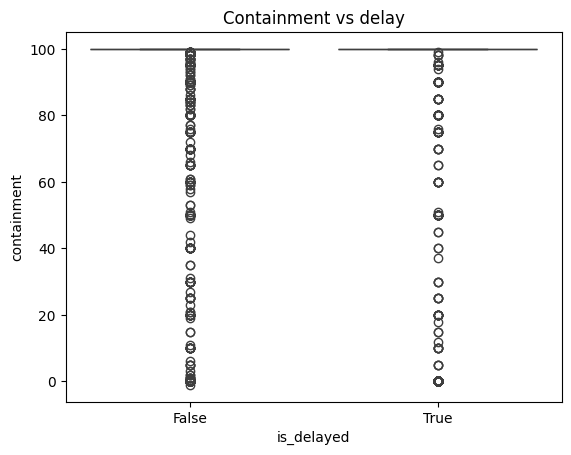

In [76]:
sns.boxplot(x="is_delayed", y="containment", data=geo)
plt.title("Containment vs delay")
plt.show()


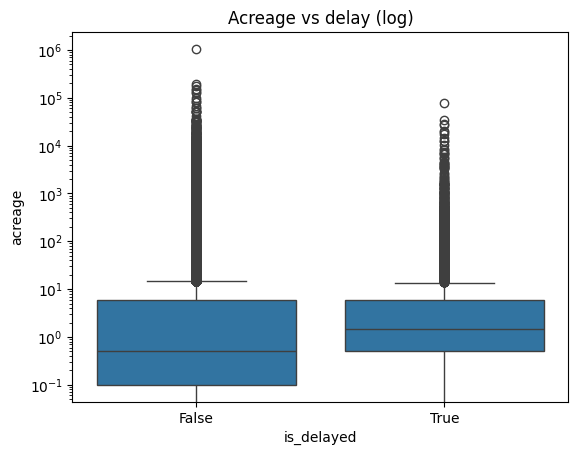

In [77]:
sns.boxplot(x="is_delayed", y="acreage", data=geo)
plt.yscale("log")
plt.title("Acreage vs delay (log)")
plt.show()


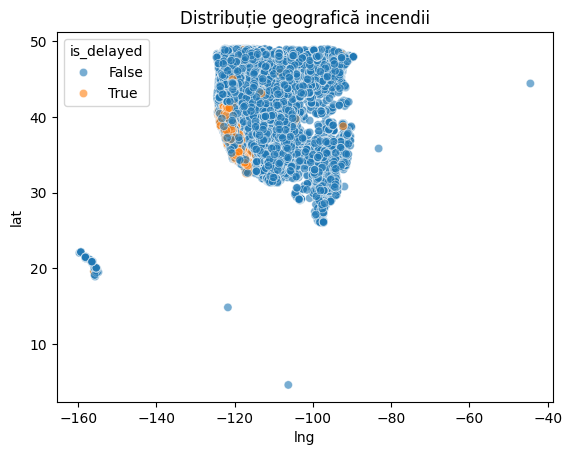

In [78]:
sns.scatterplot(
    x="lng", y="lat",
    hue="is_delayed",
    data=geo,
    alpha=0.6
)
plt.title("Distribuție geografică incendii")
plt.show()


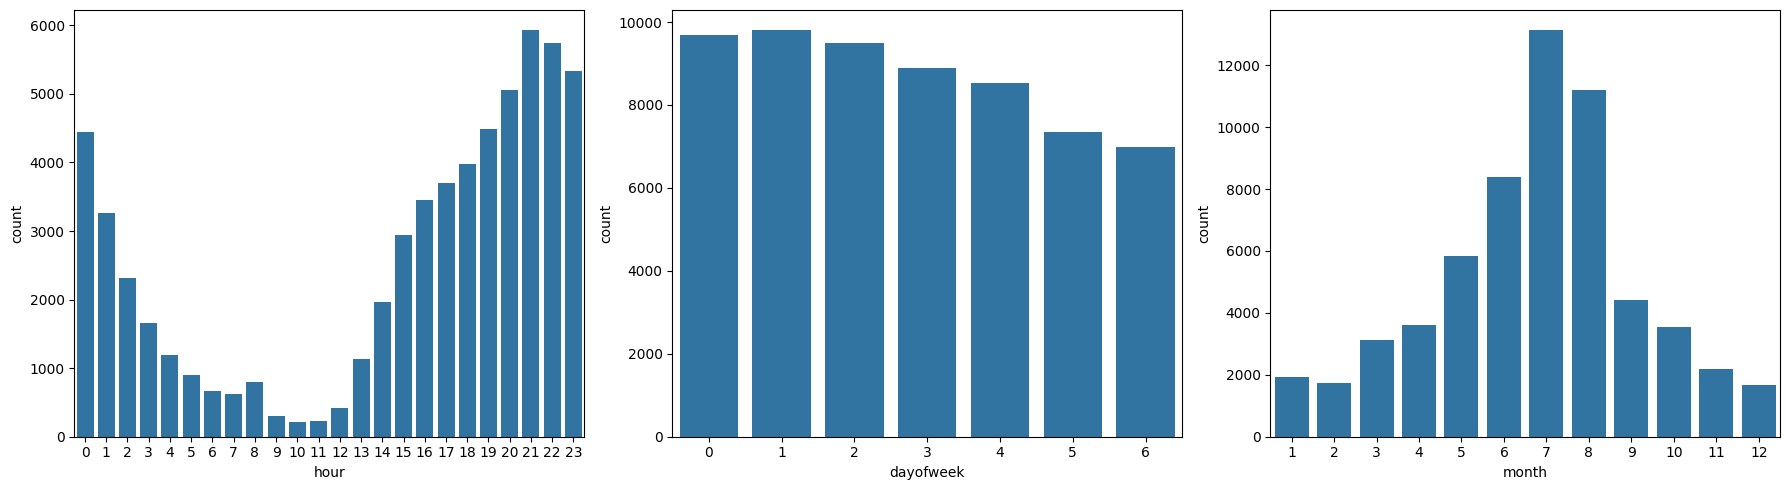

In [79]:
geo["hour"] = geo["date_created"].dt.hour
geo["dayofweek"] = geo["date_created"].dt.dayofweek
geo["month"] = geo["date_created"].dt.month

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x="hour", data=geo, ax=axes[0])
sns.countplot(x="dayofweek", data=geo, ax=axes[1])
sns.countplot(x="month", data=geo, ax=axes[2])
plt.tight_layout()
plt.show()


In [82]:
# Variabile binare: există ordin / avertisment de evacuare?
geo["has_evac_order"] = geo["evacuation_orders"].notna() & (geo["evacuation_orders"] != "")
geo["has_evac_warning"] = geo["evacuation_warnings"].notna() & (geo["evacuation_warnings"] != "")

# Convertim la 0 / 1
geo["has_evac_order"] = geo["has_evac_order"].astype(int)
geo["has_evac_warning"] = geo["has_evac_warning"].astype(int)


In [83]:
# Alegem coloanele utile pentru model (doar numerice!)
feature_cols = [
    "containment", "acreage",
    "is_fps", "is_prescribed",
    "has_evac_order", "has_evac_warning",
    "hour", "dayofweek", "month"
]


In [86]:
# Facem o copie curată
df_model = geo.copy()

# Ne asigurăm că toate coloanele sunt numerice
df_model["is_fps"] = df_model["is_fps"].fillna(False).astype(int)
df_model["is_prescribed"] = df_model["is_prescribed"].fillna(False).astype(int)

# Eliminăm rândurile fără etichetă sau valori lipsă în features
df_model = df_model.dropna(subset=feature_cols + ["is_delayed"])

# Definim X și y
X = df_model[feature_cols]
y = df_model["is_delayed"].astype(int)



In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standardizăm doar feature-urile, nu și eticheta
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Împărțim în train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:45:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [93]:
models = {
    "Logistic Regression": (y_pred_lr, y_prob_lr),
    "Random Forest": (y_pred_rf, y_prob_rf),
    "XGBoost": (y_pred_xgb, y_prob_xgb)
}

for name, (y_pred, y_prob) in models.items():
    print("="*60)
    print(f"🔹 Rezultate pentru: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))
    print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob), 4))


🔹 Rezultate pentru: Logistic Regression
Confusion Matrix:
[[6042  160]
 [ 476  236]]

Classification Report:
              precision    recall  f1-score   support

           0      0.927     0.974     0.950      6202
           1      0.596     0.331     0.426       712

    accuracy                          0.908      6914
   macro avg      0.761     0.653     0.688      6914
weighted avg      0.893     0.908     0.896      6914

ROC-AUC Score: 0.6761
🔹 Rezultate pentru: Random Forest
Confusion Matrix:
[[5913  289]
 [ 533  179]]

Classification Report:
              precision    recall  f1-score   support

           0      0.917     0.953     0.935      6202
           1      0.382     0.251     0.303       712

    accuracy                          0.881      6914
   macro avg      0.650     0.602     0.619      6914
weighted avg      0.862     0.881     0.870      6914

ROC-AUC Score: 0.7857
🔹 Rezultate pentru: XGBoost
Confusion Matrix:
[[6071  131]
 [ 536  176]]

Classification R

In [94]:
pip install imbalanced-learn


In [95]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Aplicăm SMOTE pe setul de antrenare
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verificare distribuție
print("Distribuție după SMOTE:", np.bincount(y_resampled))


Distribuție după SMOTE: [14470 14470]


In [96]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_resampled, y_resampled)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=None)  # Fără 'balanced' acum!
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_resampled, y_resampled)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:56:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [97]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

models = {
    "Logistic Regression (SMOTE)": (y_pred_lr, y_prob_lr),
    "Random Forest (SMOTE)": (y_pred_rf, y_prob_rf),
    "XGBoost (SMOTE)": (y_pred_xgb, y_prob_xgb)
}

for name, (y_pred, y_prob) in models.items():
    print("="*60)
    print(f"🔹 Rezultate pentru: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))
    print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob), 4))


🔹 Rezultate pentru: Logistic Regression (SMOTE)
Confusion Matrix:
[[5726  476]
 [ 432  280]]

Classification Report:
              precision    recall  f1-score   support

           0      0.930     0.923     0.927      6202
           1      0.370     0.393     0.381       712

    accuracy                          0.869      6914
   macro avg      0.650     0.658     0.654      6914
weighted avg      0.872     0.869     0.870      6914

ROC-AUC Score: 0.6728
🔹 Rezultate pentru: Random Forest (SMOTE)
Confusion Matrix:
[[5585  617]
 [ 432  280]]

Classification Report:
              precision    recall  f1-score   support

           0      0.928     0.901     0.914      6202
           1      0.312     0.393     0.348       712

    accuracy                          0.848      6914
   macro avg      0.620     0.647     0.631      6914
weighted avg      0.865     0.848     0.856      6914

ROC-AUC Score: 0.7788
🔹 Rezultate pentru: XGBoost (SMOTE)
Confusion Matrix:
[[5547  655]
 [ 413 

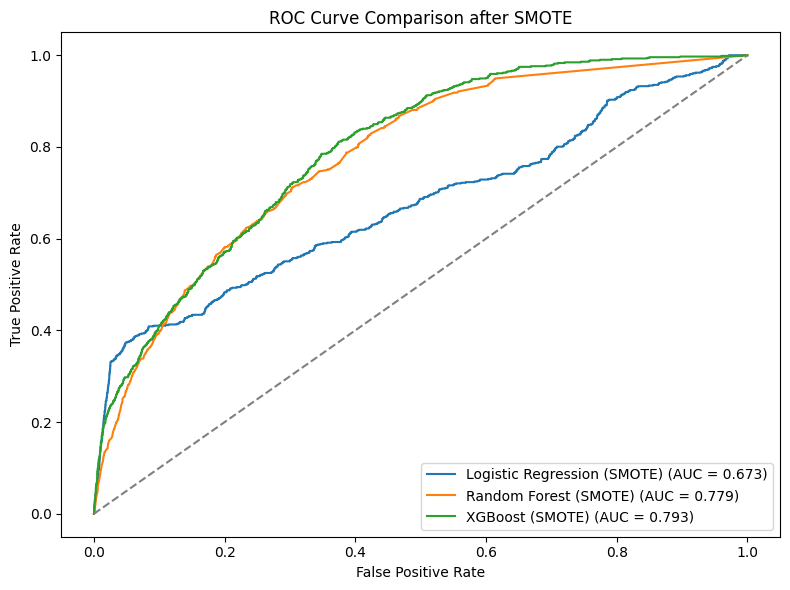

In [98]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for name, (y_pred, y_prob) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison after SMOTE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


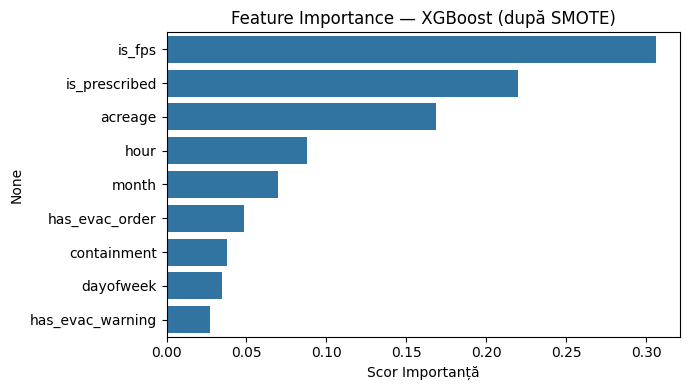

In [101]:
# Numele coloanelor
feature_names = X.columns if isinstance(X, pd.DataFrame) else features

# Extragem importanța
xgb_importance = pd.Series(xgb.feature_importances_, index=feature_names).sort_values(ascending=False)

# Vizualizare
plt.figure(figsize=(7,4))
sns.barplot(x=xgb_importance.values, y=xgb_importance.index)
plt.title("Feature Importance — XGBoost (după SMOTE)")
plt.xlabel("Scor Importanță")
plt.tight_layout()
plt.show()


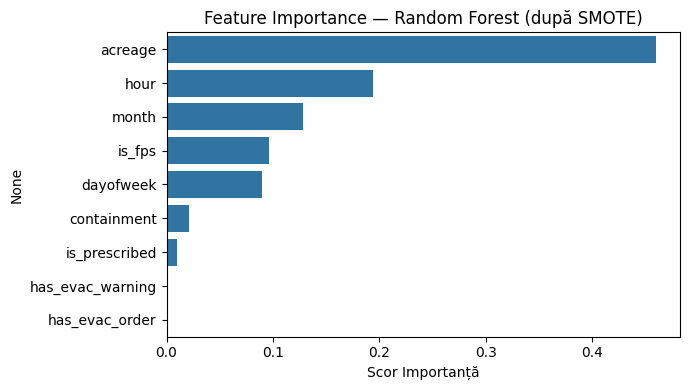

In [102]:
# Extragem importanța
rf_importance = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)

# Vizualizare
plt.figure(figsize=(7,4))
sns.barplot(x=rf_importance.values, y=rf_importance.index)
plt.title("Feature Importance — Random Forest (după SMOTE)")
plt.xlabel("Scor Importanță")
plt.tight_layout()
plt.show()


In [104]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00


In [105]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [106]:
model_selector = widgets.Dropdown(
    options=["Logistic Regression", "Random Forest", "XGBoost"],
    description="Model:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px')
)

display(model_selector)


Dropdown(description='Model:', layout=Layout(width='300px'), options=('Logistic Regression', 'Random Forest', …

In [107]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"=== {name} ===")
    print(confusion_matrix(y_test, y_pred))
    print("\n", classification_report(y_test, y_pred))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
    plt.plot([0,1],[0,1],'--',color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve — {name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

button = widgets.Button(description="Afișează scoruri model")
output = widgets.Output()

def on_button_clicked(b):
    output.clear_output()
    with output:
        model_name = model_selector.value
        model = {"Logistic Regression": lr, "Random Forest": rf, "XGBoost": xgb}[model_name]
        evaluate_model(model, model_name)

button.on_click(on_button_clicked)
display(button, output)


Button(description='Afișează scoruri model', style=ButtonStyle())

Output()